In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
np.random.seed(22)

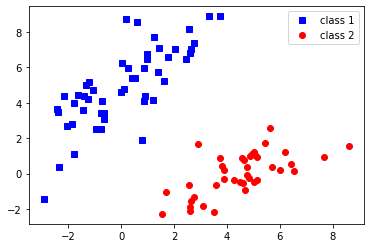

In [3]:
means = [[0, 5], [5, 0]]
cov0 = [[4, 3], [3, 4]]
cov1 = [[3, 1], [1, 1]]
N0 = 50
N1 = 40
N = N0 + N1
X0 = np.random.multivariate_normal(means[0], cov0, N0) # shape = (50, 2)
X1 = np.random.multivariate_normal(means[1], cov1, N1) # shape = (40, 2)

plt.plot(X0[:, 0], X0[:, 1], 'bs', label='class 1')
plt.plot(X1[:, 0], X1[:, 1], 'ro', label='class 2')
plt.legend()
plt.show()

In [5]:
# build S_B
m0 = np.mean(X0.T, axis=1, keepdims=True)
m1 = np.mean(X1.T, axis=1, keepdims=True)
a = m0 - m1
S_B = a.dot(a.T) # shape = (2, 2)

# build S_W
A = X0.T - np.tile(m0, (1, N0))
B = X1.T - np.tile(m1, (1, N1))

S_W = A.dot(A.T) + B.dot(B.T) # shape = (2, 2)

# solution found by formula
_, W = np.linalg.eig(np.linalg.inv(S_W).dot(S_B)) # shape = (2, 2)
w1 = W[:, 0]
print('w1 =',w1)

w1 = [ 0.75091074 -0.66040371]


In [7]:
# solution found by sklearn
X = np.concatenate((X0, X1), axis=0)
y = np.array([0]*N0 + [1]*N1)

clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
w2 = clf.coef_/np.linalg.norm(clf.coef_)
print('w2 =', w2)

w2 = [[ 0.75091074 -0.66040371]]
